In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [137]:
df = pd.read_csv('/content/overwatch_competitions_data_clear.csv')

In [138]:
df.head()

,Unnamed: 0,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,...,psychological_condition,eliminations,objective_kills,damage,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped
0,0,12/4/2016,NaN,3,1.0,2387,NaN,NaN,NaN,win,...,meh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12/4/2016,NaN,3,2.0,2387,2367,-20,NaN,loss,...,meh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12/4/2016,NaN,3,2.0,NaN,NaN,NaN,NaN,loss,...,meh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,12/4/2016,NaN,3,3.0,2367,2367,0,NaN,NaN,...,meh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12/15/2016,NaN,3,4.0,2367,2367,0,NaN,NaN,...,meh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3299 non-null   int64  
 1   date                     3299 non-null   object 
 2   time                     1501 non-null   object 
 3   season                   3299 non-null   int64  
 4   game_id                  2567 non-null   float64
 5   sr_start                 1674 non-null   object 
 6   sr_finish                1672 non-null   object 
 7   sr_delta                 1672 non-null   object 
 8   streak_number            2254 non-null   object 
 9   result                   3266 non-null   object 
 10  my_team_sr               3255 non-null   object 
 11  enemy_team_sr            3255 non-null   object 
 12  team_sr_delta            3251 non-null   object 
 13  my_team_1                3295 non-null   object 
 14  my_team_2               

In [140]:
df.describe()

,Unnamed: 0,season,game_id,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped
count,3299.000000,3299.000000,2567.000000,271.000000,269.000000,269.000000,265.000000,149.000000,109.000000,156.000000
mean,1649.000000,4.520764,174.597974,7.933579,5852.706320,9825.516729,9.452830,33.966443,7.669725,11.455128
std,952.483596,1.404244,137.973312,6.974771,4195.568791,4692.357682,5.582596,13.700176,9.068724,11.967883
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,824.500000,3.000000,65.500000,2.000000,2534.000000,6677.000000,6.000000,24.000000,4.000000,2.000000
50%,1649.000000,4.000000,145.000000,6.000000,5418.000000,9460.000000,9.000000,28.000000,6.000000,7.500000
75%,2473.500000,6.000000,224.000000,11.000000,8638.000000,12862.000000,12.000000,44.000000,9.000000,18.000000
max,3298.000000,7.000000,538.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000,50.000000


In [141]:
df.nunique()

,0
Unnamed: 0,3299
date,211
time,8
season,5
game_id,538
sr_start,683
sr_finish,683
sr_delta,89
streak_number,27
result,3


In [142]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
time,1798
season,0
game_id,732
sr_start,1625
sr_finish,1627
sr_delta,1627
streak_number,1045
result,33


In [143]:
round((df.isnull().sum() / df.shape[0] * 100),3)

,0
Unnamed: 0,0.000
date,0.000
time,54.501
season,0.000
game_id,22.189
sr_start,49.257
sr_finish,49.318
sr_delta,49.318
streak_number,31.676
result,1.000


In [144]:
df = df.drop(columns = ['Unnamed: 0','game_id','character_2','character_3',
                        'note','eliminations','objective_kills','damage',
                        'healing','deaths','weapon_accuracy','offensive_assists',
                        'defensive_assists','scoped'])

In [145]:
most_used_time = df['time'].mode()[0]
df['time'] = df['time'].fillna(most_used_time)

most_used_sr_start = df['sr_start'].mode()[0]
df['sr_start'] = df['sr_start'].fillna(most_used_sr_start)

most_used_sr_finish = df['sr_finish'].mode()[0]
df['sr_finish'] = df['sr_finish'].fillna(most_used_sr_finish)

most_used_sr_delta = df['sr_delta'].mode()[0]
df['sr_delta'] = df['sr_delta'].fillna(most_used_sr_delta)

most_used_streak_number = df['streak_number'].mode()[0]
df['streak_number'] = df['streak_number'].fillna(most_used_streak_number)

most_used_score_distance = df['score_distance'].mode()[0]
df['score_distance'] = df['score_distance'].fillna(most_used_score_distance)

most_used_time_left = df['time_left'].mode()[0]
df['time_left'] = df['time_left'].fillna(most_used_time_left)

most_used_communication = df['communication'].mode()[0]
df['communication'] = df['communication'].fillna(most_used_communication)

In [146]:
df.dropna(subset = ['result','my_team_sr','enemy_team_sr','team_sr_delta',
                    'my_team_1','my_team_2','my_team_3','my_team_4',
                    'my_team_5','my_team_6','enemy_team_1','enemy_team_2',
                    'enemy_team_3','enemy_team_4','enemy_team_5','enemy_team_6',
                    'map','round','capscore','team_role','match_length',
                    'charcter_1','psychological_condition'],inplace = True)

In [147]:
round((df.isnull().sum() / df.shape[0] * 100),3)

,0
date,0.0
time,0.0
season,0.0
sr_start,0.0
sr_finish,0.0
sr_delta,0.0
streak_number,0.0
result,0.0
my_team_sr,0.0
enemy_team_sr,0.0


In [148]:
df.head()

,date,time,season,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,enemy_team_sr,...,map,round,capscore,score_distance,time_left,team_role,match_length,charcter_1,communication,psychological_condition
0,12/4/2016,night,3,2387,-,0,-1,win,-,-,...,nepal,-,wwllw,3-2,0,cp,22,ana,2,meh
1,12/4/2016,night,3,2387,2367,-20,-1,loss,2617,2619,...,dorado,1,-,74.54,0,attack,6,ana,2,meh
2,12/4/2016,night,3,-,-,0,-1,loss,2617,2619,...,dorado,2,0,74.5,0,defend,4,torbjorn,2,meh
5,12/15/2016,night,3,2367,2330,-37,-1,loss,2659,2687,...,king's row,1,3,70.19,0.8,attack,8,lucio,2,meh
6,12/15/2016,night,3,-,-,0,-1,loss,2659,2687,...,king's row,2,3,70.19,3:25,defend,5,lucio,2,meh


<BarContainer object of 2962 artists>

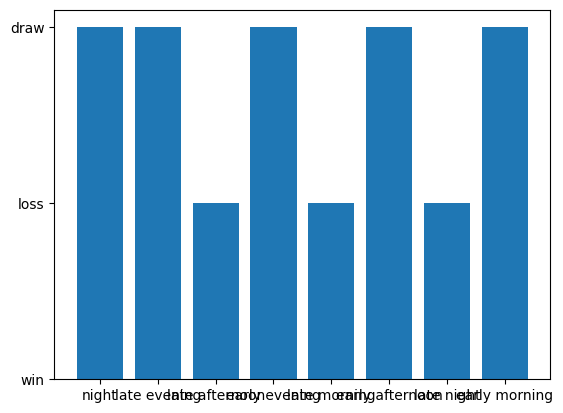

In [149]:
plt.bar(df['time'],df.result)

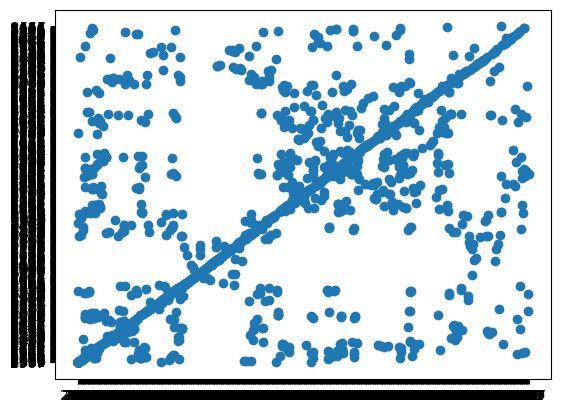

In [150]:
plt.scatter(df['sr_start'],df.sr_finish)

<BarContainer object of 2962 artists>

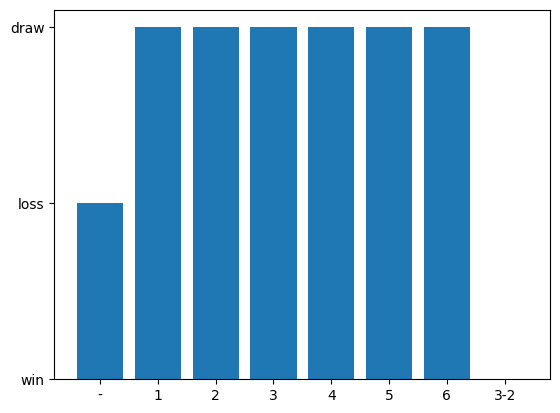

In [151]:
plt.bar(df['round'],df.result)

In [152]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

cat_col = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_col:
  df[col] = encoder.fit_transform(df[col])

df.head()

,date,time,season,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,enemy_team_sr,...,map,round,capscore,score_distance,time_left,team_role,match_length,charcter_1,communication,psychological_condition
0,69,7,3,194,0,43,0,2,0,0,...,11,0,27,114,0,1,33,0,2,11
1,69,7,3,194,182,8,0,1,321,340,...,0,1,0,577,0,0,59,0,2,11
2,69,7,3,0,0,43,0,1,321,340,...,0,2,1,575,0,2,52,13,2,11
5,56,7,3,180,155,24,0,1,356,396,...,9,1,11,511,3,0,64,3,2,11
6,56,7,3,0,0,43,0,1,356,396,...,9,2,11,511,203,2,56,3,2,11


In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df)

scaled_pd = pd.DataFrame(scaled,columns = df.columns)

scaled_pd.head()

,date,time,season,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,enemy_team_sr,...,map,round,capscore,score_distance,time_left,team_role,match_length,charcter_1,communication,psychological_condition
0,0.331731,1.0,0.0,0.299845,0.000000,0.511905,0.0,1.0,0.000000,0.000000,...,0.647059,0.000000,0.931034,0.139706,0.000000,0.5,0.445946,0.0000,0.666667,0.647059
1,0.331731,1.0,0.0,0.299845,0.280000,0.095238,0.0,0.5,0.475556,0.485714,...,0.000000,0.142857,0.000000,0.707108,0.000000,0.0,0.797297,0.0000,0.666667,0.647059
2,0.331731,1.0,0.0,0.000000,0.000000,0.511905,0.0,0.5,0.475556,0.485714,...,0.000000,0.285714,0.034483,0.704657,0.000000,1.0,0.702703,0.8125,0.666667,0.647059
3,0.269231,1.0,0.0,0.278207,0.238462,0.285714,0.0,0.5,0.527407,0.565714,...,0.529412,0.142857,0.379310,0.626225,0.008523,0.0,0.864865,0.1875,0.666667,0.647059
4,0.269231,1.0,0.0,0.000000,0.000000,0.511905,0.0,0.5,0.527407,0.565714,...,0.529412,0.285714,0.379310,0.626225,0.576705,1.0,0.756757,0.1875,0.666667,0.647059


In [154]:
X = df.drop(columns = 'result')
y = df.result

In [155]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [156]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)

ridge.fit(X_train,y_train)

Ridge()

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.83      0.80      0.82       283
           2       0.75      0.88      0.81       273

    accuracy                           0.78       593
   macro avg       0.53      0.56      0.54       593
weighted avg       0.74      0.78      0.76       593



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
